In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os
from pandas.io.json import json_normalize
import pyslha
pd.options.mode.chained_assignment = None #Disable copy warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from test.testCreator import equalObjs

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.3)
cm = plt.cm.get_cmap('RdYlBu')

In [17]:
def plotXsecDiff(fileA,fileB):
    fileA = pyslha.readSLHAFile('./slha_tests/test_LH500.slha')
    fileB = pyslha.readSLHAFile('./slha_tests/LHT500GeV_juhi.slha')
    xsecA = dict([ [str(proc.pidsfinal).replace('[','').replace(']','').replace(',','_').replace(' ',''),
                   max([x.value for x in proc.get_xsecs(sqrts=13000)])*1000]
                    for proc in fileA.xsections.values() if proc.get_xsecs(sqrts=13000)])  
    xsecB= dict([ [str(proc.pidsfinal).replace('[','').replace(']','').replace(',','_').replace(' ',''),
                   max([x.value for x in proc.get_xsecs(sqrts=13000)])*1000]
                    for proc in fileB.xsections.values() if proc.get_xsecs(sqrts=13000)])  

    xsecDiffList = sorted([[pdg,2.*abs(xsecA[pdg]-xsecB[pdg])/(xsecA[pdg]+xsecB[pdg])] for pdg in xsecA], 
                       key = lambda pt: pt[1],reverse=True)
    nproc = 0
    nplot = 15    
    while nproc < len(xsecDiffList):
        fig = plt.figure(figsize=(18,5))
        plt.subplot(121)
        xsecDiff = dict(xsecDiffList[nproc:nproc+nplot])
        plt.bar(range(len(xsecDiff)), xsecDiff.values())
        plt.xticks(.1+ np.arange(len(xsecDiff)), xsecDiff.keys(), rotation="vertical" )
        plt.ylabel("rel. diff")
        plt.title('max diff = %1.2f' %max(xsecDiff.values()))        
        plt.subplot(122)
        xsecs = dict([[pdg,xsecA[pdg]] for pdg in xsecDiff])
        plt.bar(range(len(xsecs)), xsecs.values())
        plt.xticks(.1+ np.arange(len(xsecs)), xsecs.keys(), rotation="vertical" )
        plt.ylabel("xsec")
        plt.yscale('log')
        
        plt.show()
        
        nproc += nplot
        if min(xsecDiff.values()) < 0.01:
            break

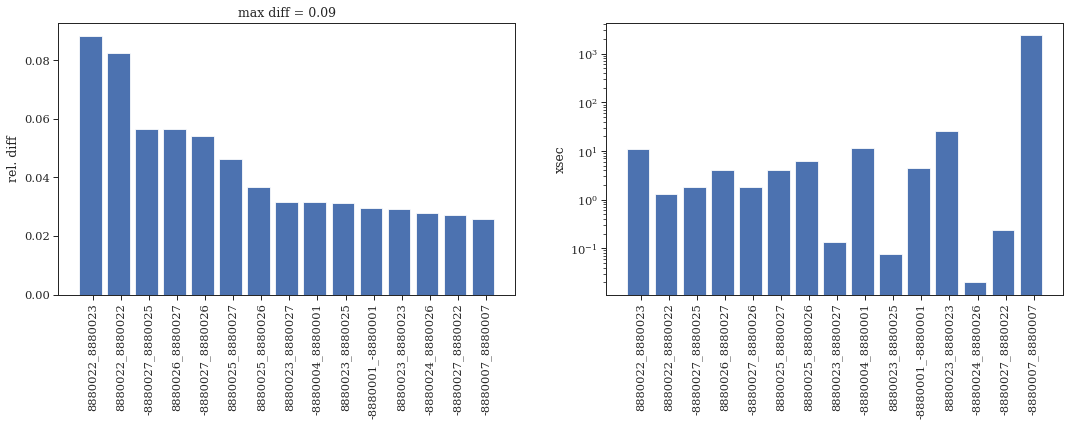

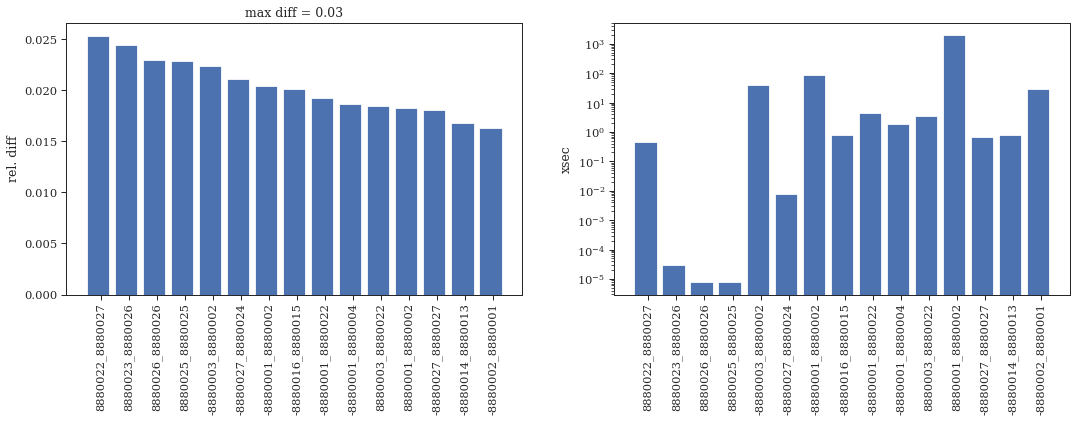

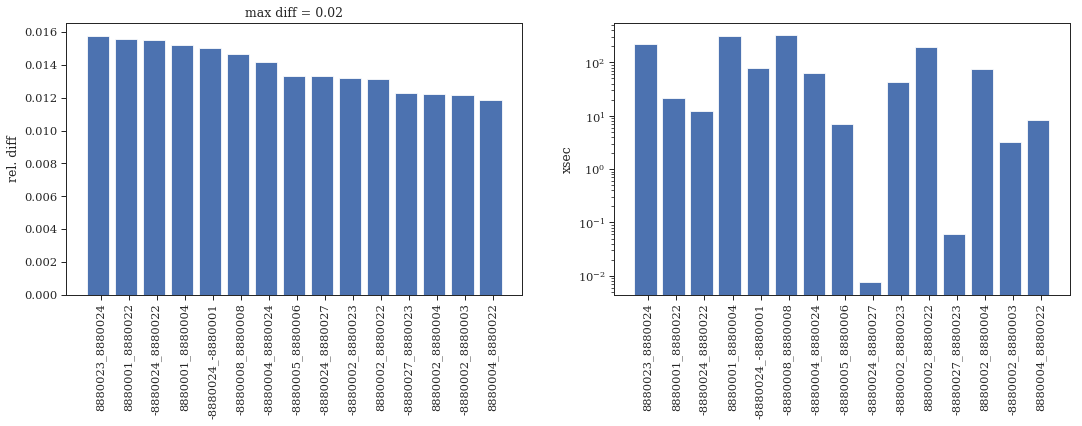

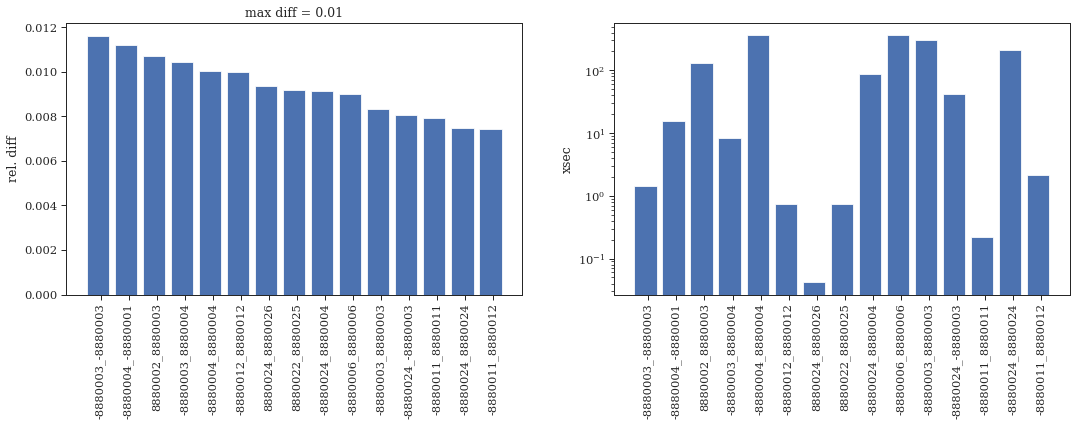

In [18]:
plotXsecDiff('./slha_tests/test_LH500.slha','./slha_tests/LHT500GeV_juhi.slha')

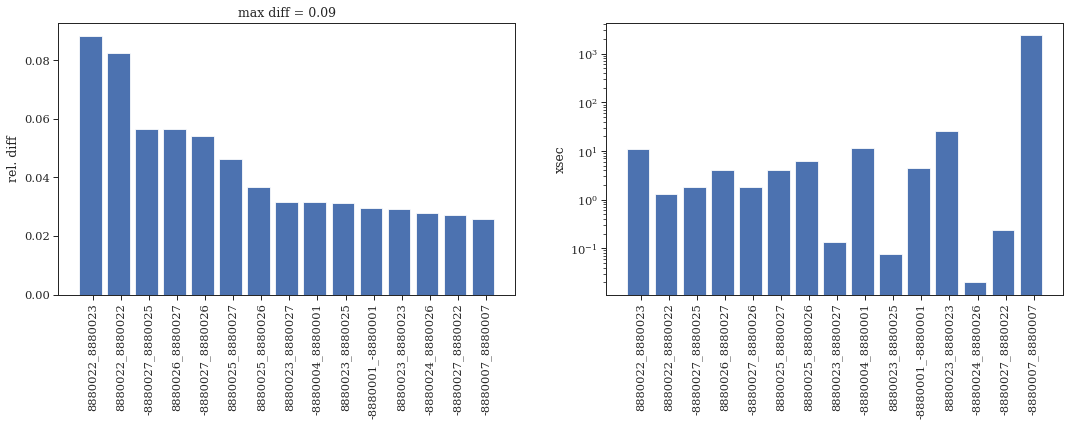

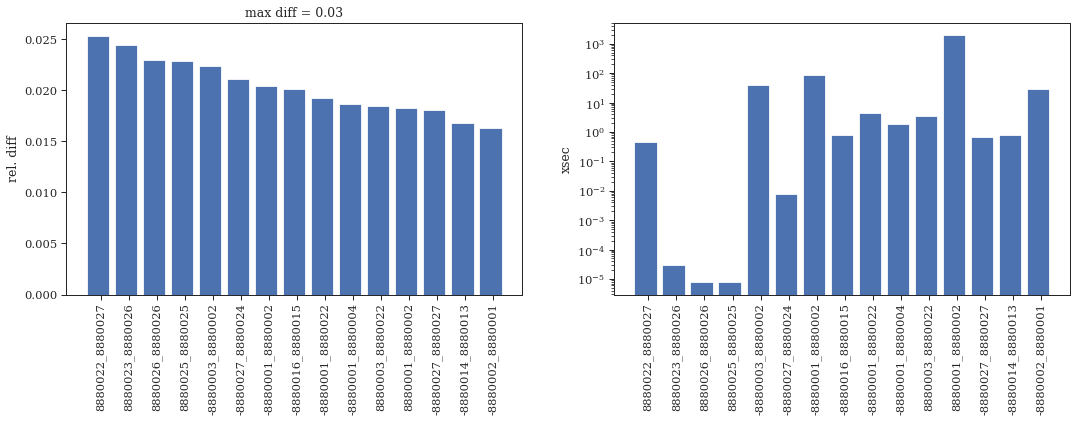

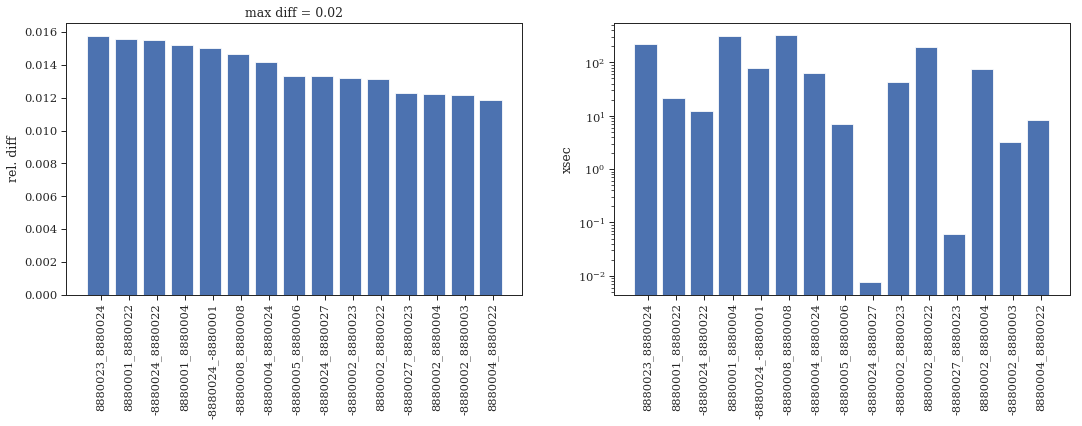

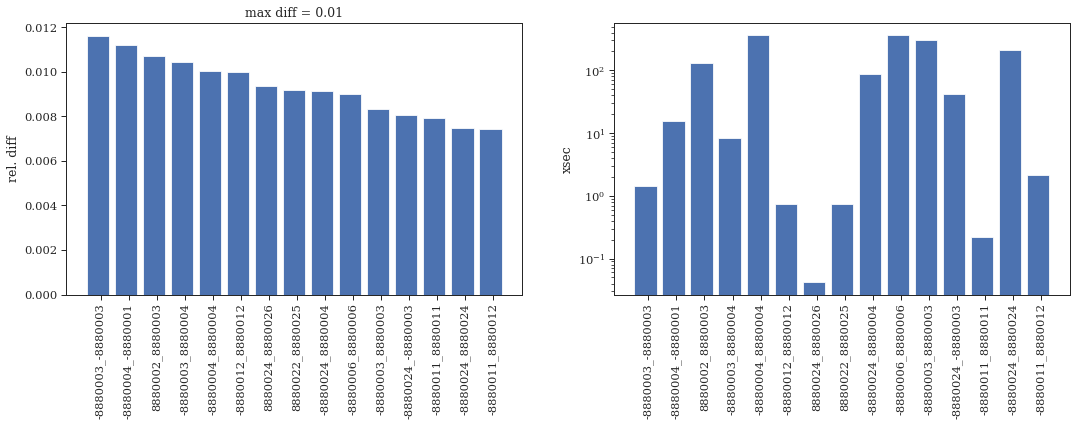

In [19]:
plotXsecDiff('./slha_tests/test_LH1000.slha','./slha_tests/LHT1TeV_juhi.slha')